In [1]:
from tensorflow.keras.layers import Input,Flatten,Lambda,Dense
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
image_size=[224,224]
train_path="/content/drive/MyDrive/car_brand_classification_transfer_learning/Datasets/Train"
test_path="/content/drive/MyDrive/car_brand_classification_transfer_learning/Datasets/Test"

In [4]:
# here we use imagenet weight 
resnet=ResNet50(input_shape=image_size+[3],include_top=False,weights="imagenet")

94773248/94765736 [==============================] - 1s 0us/step


In [5]:
# dont train existing weights
for layers in resnet.layers:
    layers.trainable=False

In [6]:
folders=glob("/content/drive/MyDrive/car_brand_classification_transfer_learning/Datasets/Train/*")
len(folders)

3

In [7]:
x=Flatten()(resnet.output)
prediction=Dense(len(folders),activation="softmax")(x)

In [8]:
model=Model(inputs=resnet.input,outputs=prediction)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
model.compile(
               loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [11]:
# use imagedategenerator to import image from dataset
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=.2,
                                zoom_range=.2,
                                horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
training_set=train_datagen.flow_from_directory("/content/drive/MyDrive/car_brand_classification_transfer_learning/Datasets/Train",
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="categorical")
test_set=test_datagen.flow_from_directory("/content/drive/MyDrive/car_brand_classification_transfer_learning/Datasets/Test",
                                         target_size=(224,224),
                                         batch_size=32,
                                         class_mode="categorical")

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [13]:

r=model.fit_generator(training_set,
           validation_data=test_set,
           epochs=50,
           steps_per_epoch=len(training_set),
            validation_steps=len(test_set)
           )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 55s 14s/step - loss: 8.6531 - accuracy: 0.2188 - val_loss: 5.0942 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 1s 641ms/step - loss: 6.0152 - accuracy: 0.2500 - val_loss: 7.5900 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 1s 641ms/step - loss: 5.5322 - accuracy: 0.3906 - val_loss: 8.8096 - val_accuracy: 0.2931
Epoch 4/50
2/2 [==============================] - 1s 642ms/step - loss: 5.4299 - accuracy: 0.4688 - val_loss: 6.0145 - val_accuracy: 0.1897
Epoch 5/50
2/2 [==============================] - 1s 635ms/step - loss: 3.3419 - accuracy: 0.3750 - val_loss: 1.3839 - val_accuracy: 0.4828
Epoch 6/50
2/2 [==============================] - 1s 630ms/step - loss: 2.9622 - accuracy: 0.4062 - val_loss: 3.5426 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 1s 661ms/step - loss: 3.0714 - accuracy: 0.4375 - val_loss: 1.4550 - val_accuracy: 0.4655
Epoch 8/50
2/2 [=====

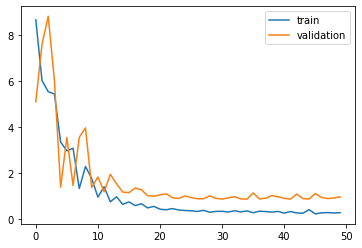

In [14]:
# plot the loss
plt.plot(r.history["loss"],label="train")
plt.plot(r.history["val_loss"],label="validation")
plt.legend()
plt.show()

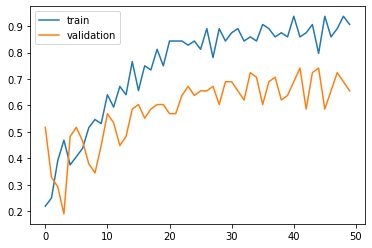

In [15]:
# plot the accuracy
plt.plot(r.history["accuracy"],label="train")
plt.plot(r.history["val_accuracy"],label="validation")
plt.legend()
plt.show()

In [16]:
# save file in .hd5 file
from keras.models import load_model
model.save("resnet50.h5")
prediction=model.predict(test_set)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [17]:
prediction[0]

array([0.8105637 , 0.09475677, 0.09467953], dtype=float32)

In [18]:
np.argmax(prediction,axis=1)

array([0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 0,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 1, 2, 1, 2, 0, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 0, 2, 2, 1, 2, 0, 1])

In [29]:
from keras.preprocessing import image
from keras.models import load_model
model=load_model("resnet50.h5")

In [30]:
image_data="/content/audi.jpg"

In [31]:
img=image.load_img("/content/audi.jpg",target_size=(224,224))

In [32]:
x=image.img_to_array(img)

In [33]:
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [34]:
x.shape

(224, 224, 3)

In [35]:
x=x/255

In [36]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)

In [37]:
img_data.shape

(1, 224, 224, 3)

In [38]:
model.predict(img_data)

array([[3.7954426e-03, 1.5934798e-04, 9.9604517e-01]], dtype=float32)

In [39]:
np.argmax(model.predict(img_data),axis=1)

array([2])